In [2]:
!pip install -r requirements.txt

  Using cached gym-0.17.1.tar.gz (1.6 MB)
  Using cached pyglet-1.5.0-py2.py3-none-any.whl (1.0 MB)
  Using cached cloudpickle-1.3.0-py2.py3-none-any.whl (26 kB)
  Created wheel for gym: filename=gym-0.17.1-py3-none-any.whl size=1648710 sha256=543d16535e0f05a520eee60e2aebf6c8fa0cd99e92d6134cc9e0ec8d2d083a8a
  Stored in directory: /Users/satwik/Library/Caches/pip/wheels/83/05/c5/c585041ad642c75ce98ecee9a930e34dab7eb64fd5305972be
Successfully built gym


In [3]:
from collections import deque

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
%load_ext autoreload
%autoreload 2

from environment import AvalonEnv
from agent import RandomAgent, QTableAgent
from q_learning_trial import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
env = AvalonEnv(6, enable_logs=False, autoplay=False)
     
agent = QTableAgent(env=env)
num_episodes = 15000
rewards, penalties, agent_game_results = train(num_episodes, env, agent, target_reward=4, last_n_plot=100, callback_every=5000)


Average reward per episode -8.453
Average penalties per episode: 8.95
Agent won 10.344827586206897% games out of 29 games while taking MINION role.
Agent won 53.52112676056338% games out of 71 games while taking SERVANT role.
Saving new best model to q_table.pickle

Average reward per episode -7.733
Average penalties per episode: 8.9
Agent won 62.31884057971014% games out of 69 games while taking SERVANT role.
Agent won 16.129032258064516% games out of 31 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -7.587000000000001
Average penalties per episode: 9.53
Agent won 57.74647887323944% games out of 71 games while taking SERVANT role.
Agent won 17.24137931034483% games out of 29 games while taking MINION role.
Saving new best model to q_table.pickle


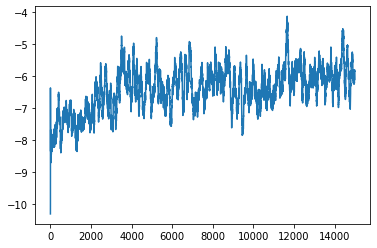

In [11]:
plt.plot(range(num_episodes), rewards)
plt.show()

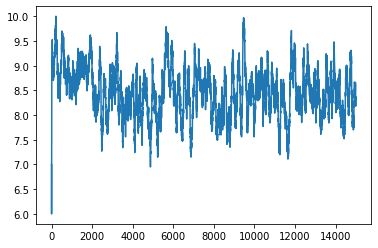

In [12]:
plt.plot(range(num_episodes), penalties)
plt.show()